----------------------------------------  EDA ----------------------------------------

# Hoja 'Hechos' del excel 'homicidios'


### Análsis Exploratorio de Datos


Se lleva a cabo una exploración de los datos para identificar posibles patrones que puedan proporcionar información útil para tomar decisiones sobre la reducción de víctimas fatales.

Para mantener la lectura organizada, se han encapsulado los códigos de los gráficos y otros datos dentro de funciones en una biblioteca llamada "databricks", que se encuentra adjunta en este repositorio.

Importamos librerias

In [1]:
import numpy as np
import pandas as pd

import Databricks

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt


Abrimos el Dataframe de 'hechos' que anteriormente guardamos en '.parquet'

In [2]:
df_hechos = pd.read_parquet('../DataExportada/df_hechos.parquet')

### Sobre los datos...


Si analizamos de manera general , podemos observar que contamos con 696 filas y 21 columnas\
procederemos a visualizar cuales son estas 21 columnas.

In [3]:
df_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

Notas algo? Exacto... algunos nombres de las columnas estan en minúsculas y otras en mayúscula.\
Para evitar cualquier problema futuro o simplemente por buena practica se decide estanadarizar los nombres de la siguiente forma.

In [4]:
# Se coloca la primera en mayúscula
df_hechos.columns = [x.capitalize() for x in df_hechos.columns]
# Se reemplazan los guiones por espacios
df_hechos.columns = df_hechos.columns.str.replace('_', ' ')
# Se renombran algunas columnas
df_hechos = df_hechos.rename(columns={'N victimas': 'Cantidad víctimas',
                                                      'Aaaa':'Año',
                                                      'Mm':'Mes',
                                                      'Dd':'Día',
                                                      'Hh':'Hora entera',
                                                      'Xy (caba)':'XY (CABA)',
                                                      'Victima': 'Víctima'})
df_hechos.columns

Index(['Id', 'Cantidad víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora',
       'Hora entera', 'Lugar del hecho', 'Tipo de calle', 'Calle', 'Altura',
       'Cruce', 'Dirección normalizada', 'Comuna', 'XY (CABA)', 'Pos x',
       'Pos y', 'Participantes', 'Víctima', 'Acusado'],
      dtype='object')

### Datos Nulos

Decidimos calcular la cantidad de valores nulos que tras un analisis visual logramos captar en las columnas 'Altura', 'Cruce' y 'Direccion normalizada'\
Como asi tambien, el porcentaje que representan estos valores nulos con respecto al total de los datos que se encuentran en la columna.

In [5]:

# calculamos los porcentajes de valores nulos en las columnas específicas
df_porcentajes = pd.DataFrame({
    'Columnas': ['Altura', 'Cruce', 'Dirección normalizada'],
    'Valores nulos': [df_hechos['Altura'].isnull().sum(), df_hechos['Cruce'].isnull().sum(), df_hechos['Dirección normalizada'].isnull().sum()]
})

# Calculamos el total de valores en las columnas específicas
total_valores = df_hechos.shape[0]  # Total de filas en el DataFrame 'df_hechos'

# Calculamos los porcentajes de valores nulos
df_porcentajes['Porcentaje de valores nulos'] = (df_porcentajes['Valores nulos'] / total_valores) * 100

# Calculamos los porcentajes de valores nulos en todas las columnas
porcentaje_nulos_altura = (df_hechos['Altura'].isnull().sum() / total_valores) * 100
porcentaje_nulos_cruce = (df_hechos['Cruce'].isnull().sum() / total_valores) * 100
porcentaje_nulos_direccion = (df_hechos['Dirección normalizada'].isnull().sum() / total_valores) * 100

# Mostramos el DataFrame con los porcentajes de valores nulos
print("Datos nulos:")
print(df_porcentajes)
print()

# Mostramos información adicional sobre la columna 'Altura'
print("En la columna 'Altura' faltan el {:.1f}% de los datos.".format(porcentaje_nulos_altura))

# Mostramos información adicional sobre la columna 'Cruce'
print("En la columna 'Cruce' faltan el {:.1f}% de los datos.".format(porcentaje_nulos_cruce))

# Mostramos información adicional sobre la columna 'Dirección normalizada'
print("En la columna 'Dirección normalizada' faltan el {:.1f}% de los datos.".format(porcentaje_nulos_direccion))


Datos nulos:
                Columnas  Valores nulos  Porcentaje de valores nulos
0                 Altura            567                    81.465517
1                  Cruce            171                    24.568966
2  Dirección normalizada              8                     1.149425

En la columna 'Altura' faltan el 81.5% de los datos.
En la columna 'Cruce' faltan el 24.6% de los datos.
En la columna 'Dirección normalizada' faltan el 1.1% de los datos.



Luego de analizar  la columna 'Altura' , decidimos eliminarla ... Por que? Esta decision se debe a que este dato se completa cuando el hecho ocurre en algún punto de la calle (altura de la calle) y la mayoría de los hechos registrados ocurrieron en esquinas. Por este motivo, se considera que no es un dato relevante para el análsis y se lleva a cabo la toma de decision aclarada anteriormente.\

Igualmente,podemos observar que estos datos se encuentran en las columnas 'Lugar del hecho' y 'Dirección normalizada'.\
A continuación se muestra un ejemplo de este comportamiento, donde las dos primeras filas son esquinas y la tercera es en un punto de la cuadra.

In [6]:
df_hechos[['Altura', 'Lugar del hecho', 'Dirección normalizada']][:3]


,Altura,Lugar del hecho,Dirección normalizada
0,NaN,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G..."
1,NaN,AV GRAL PAZ Y AV DE LOS CORRALES,"PAZ, GRAL. AV. y DE LOS CORRALES AV."
2,2034.0,AV ENTRE RIOS 2034,ENTRE RIOS AV. 2034


Procedemos a eliminar , finalmente, la columna 'Altura' 

In [7]:
# Se elimina la columna
df_hechos = df_hechos.drop('Altura', axis=1)


Sobre la columna 'Cruce' podemos observar que es una variable categórica, de tipo string, que contiene 317 valores distintos y donde hay un 24,6% de valores faltantes.\
Es importante destacar que la ausencia de datos en la columna 'Cruce' indica que el hecho no ocurrió en un cruce entre dos calles específicas, sino en algún punto a lo largo de una calle, lo que hace de esta columna, una columna  interesante para evaluar si los hechos ocurren en esquinas o en algún punto de la cuadra.\
A continuación, se observa la columna 'Cruce' cuando se encuentra en nula en relación a 'Lugar del hecho' y 'Tipo de calle'.



In [8]:
# Se ven los valores nulos de cruce en relación con 'Lugar del hecho' y 'Tipo de calle'
df_hechos[df_hechos['Cruce'].isnull()][['Cruce', 'Lugar del hecho', 'Tipo de calle']][:10]

,Cruce,Lugar del hecho,Tipo de calle
2,None,AV ENTRE RIOS 2034,AVENIDA
9,None,AV ENTRE RIOS 1366,AVENIDA
14,None,SUIPACHA 156,CALLE
33,None,LIMA 1483,CALLE
35,None,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA
38,None,AUTOPISTA LUGONES PK 10000,AUTOPISTA
42,None,AV LUIS MARIA CAMPOS 30,AVENIDA
43,None,LIMA 1471,CALLE
50,None,MAGARIÑOS CERVANTES 3900,CALLE
59,None,AV LA PLATA 2384,AVENIDA


ahora procedemos a ver la columna 'Cruce' , pero esta vez con los valores NO nulos en relación con 'lugar del hecho' y 'Tipo de calle'

In [9]:
df_hechos[df_hechos['Cruce'].notnull()][['Cruce', 'Lugar del hecho', 'Tipo de calle']][:10]

,Cruce,Lugar del hecho,Tipo de calle
0,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA
1,DE LOS CORRALES AV.,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
3,"VILLEGAS, CONRADO, GRAL.",AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA
4,"SAENZ PE?A, LUIS, PRES.",AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA
5,ESCALADA AV.,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA
6,"GONZALEZ, JOAQUIN V.",NOGOYA Y JOAQUIN V. GONZALES,CALLE
7,DE LOS CORRALES AV.,AV GENERAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
8,"IRIGOYEN, BERNARDO DE",AV BELGRANO Y BERNARDO DE IRIGOYEN,AVENIDA
10,VERA,AV SCALABRINI ORTIZ Y VERA,AVENIDA
11,"QUINQUELA MARTIN, BENITO",AV REGIMIENTO DE PATRICIOS Y QUINQUELA MARTIN ...,AVENIDA


En conclusion, Se puede ver que los datos faltantes efectivamente son los que se refieren a un hecho en algún punto de la calle que no es una esquina o intersección de dos calles. Por lo tanto, se decide modificar esta columna en un valor 'si' para los casos que son hechos en cruces de calles y 'no' en el caso que no sea un cruce de calles.

In [10]:
# Se reemplazan los valores no nulos por "no" y los nulos por "si"
df_hechos['Cruce'] = np.where(df_hechos['Cruce'].notnull(), 'SI', 'NO')
# Se revisa la columna
df_hechos[['Cruce', 'Lugar del hecho', 'Tipo de calle']]

,Cruce,Lugar del hecho,Tipo de calle
0,SI,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA
1,SI,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
2,NO,AV ENTRE RIOS 2034,AVENIDA
3,SI,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA
4,SI,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA
...,...,...,...
691,SI,AV. RIESTRA Y MOM,AVENIDA
692,SI,AU DELLEPIANE Y LACARRA,AUTOPISTA
693,SI,AV. GAONA Y TERRADA,AVENIDA
694,NO,AV. EVA PERON 4071,AVENIDA


Por ultimo nos encontramos con la columna 'Dirección normalizada', la misma tiene solamente 8 datos nulos.\
Podemos ver esos datos a continuación:

In [11]:
df_hechos[df_hechos['Dirección normalizada'].isnull()][['Dirección normalizada', 'Lugar del hecho', 'Tipo de calle']]

,Dirección normalizada,Lugar del hecho,Tipo de calle
38,None,AUTOPISTA LUGONES PK 10000,AUTOPISTA
106,None,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA
119,None,SD,CALLE
180,None,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA
181,None,AU DELLEPIANE 2400,AUTOPISTA
313,None,AUTOPISTA LUGONES KM 4.7,AUTOPISTA
546,None,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA
621,None,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA


Al no tener información suficiente para modificar esos datos faltantes, se cambian esos valores nulos por SinDato (Sin Dato), para seguir con la lógica original del dataset.



In [12]:
#Rellenamos los nulos con SinDato
df_hechos['Dirección normalizada'].fillna('SinDato', inplace=True)

#Verificamos que se haya realizado el cambio
df_hechos[df_hechos['Dirección normalizada']== 'SinDato'][['Dirección normalizada', 'Lugar del hecho', 'Tipo de calle']]

,Dirección normalizada,Lugar del hecho,Tipo de calle
38,SinDato,AUTOPISTA LUGONES PK 10000,AUTOPISTA
106,SinDato,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA
119,SinDato,SD,CALLE
180,SinDato,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA
181,SinDato,AU DELLEPIANE 2400,AUTOPISTA
313,SinDato,AUTOPISTA LUGONES KM 4.7,AUTOPISTA
546,SinDato,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA
621,SinDato,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA


### Datos Duplicados


No se observan filas duplicadas. Podemos ver que en la columna 'Id' tenemos el total de registros que son únicos



In [13]:
print(f"La columna 'Id' cuenta con {len(df_hechos['Id'].unique())} valores únicos.")


La columna 'Id' cuenta con 696 valores únicos.


### Tipos de variables

En el informe, podemos observar varios tipos de variables.A continuación, se muestra el tipo de dato por cada columna.

In [14]:
Databricks.tipo_variable(df_hechos)


,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Cantidad víctimas,[<class 'int'>]
2,Fecha,[<class 'str'>]
3,Año,[<class 'int'>]
4,Mes,[<class 'int'>]
5,Día,[<class 'int'>]
6,Hora,[<class 'str'>]
7,Hora entera,[<class 'str'>]
8,Lugar del hecho,[<class 'str'>]
9,Tipo de calle,[<class 'str'>]


Decidimos cambiar en la columna 'Hora', su tipo de dato a "datetime.time" y se puede ver que falta el dato de la hora tanto en las columnas 'Hora' como 'Hora entera'. 



In [15]:
# Se cambia el tipo de dato
df_hechos['Hora'] = df_hechos['Hora'].apply(lambda x: Databricks.convertir_a_datatime(x))
# Se verifica la cantidad de valores por tipo de dato en la columna 'hora'
print('Tipos de datos:')
print(df_hechos['Hora'].apply(type).value_counts())
print('Registro con NoneType:')
df_hechos[df_hechos['Hora'].isna()]

Tipos de datos:
Hora
<class 'datetime.time'>    695
<class 'NoneType'>           1
Name: count, dtype: int64
Registro con NoneType:


,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
518,2019-0103,1,12/18/2019,2019,12,18,None,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


para imputar un valor se decide calcular la hora mas comun

In [16]:
# calcula la hora mas común
hora_moda = df_hechos['Hora'].mode().iloc[0]
print(f'La hora mas común es: {hora_moda}')
# Se reemplaza el valor None por la hora más común
df_hechos['Hora'].fillna(hora_moda, inplace=True)
# se verifica el tipo de dato para la columna
df_hechos['Hora'].apply(type).value_counts()

La hora mas común es: 09:00:00


Hora
<class 'datetime.time'>    696
Name: count, dtype: int64

Como podemos observar, en la columna 'Hora entera' nos encontramos con un valor 'SD' ... El cual vamos a reemplazar por la hora mas comun.

In [17]:
df_hechos[df_hechos['Id']=='2019-0103']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
518,2019-0103,1,12/18/2019,2019,12,18,09:00:00,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [18]:
# Se imputa la hora moda al dato faltante
df_hechos['Hora entera'] = df_hechos['Hora entera'].apply(lambda x: int(hora_moda.hour) if x == "SD" else x)
# Se verifica el tipo de dato
df_hechos['Hora entera'].apply(type).value_counts()

Hora entera
<class 'str'>    695
<class 'int'>      1
Name: count, dtype: int64

In [19]:
#Pasamos a 'int" el tipo de dato de 'Hora entera' 
df_hechos['Hora entera'] = df_hechos['Hora entera'].astype(int)
# Se verifica el tipo de dato
df_hechos['Hora entera'].apply(type).value_counts()

Hora entera
<class 'int'>    696
Name: count, dtype: int64

In [20]:
# Se verifica el registro completado
df_hechos[df_hechos['Id']=='2019-0103']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
518,2019-0103,1,12/18/2019,2019,12,18,09:00:00,9,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Finalmente, nos encontramos con la columna 'Calle' donde podemos observar un valor faltante ... El cual no es posible recuperar ya que no se cuenta con el dato de la calle donde ocurrió el hecho. Por lo tanto, se decide imputar 'SinDato' a este valor faltante.

In [21]:
#Observamos la fila donde calle es None
df_hechos[df_hechos['Id']=='2016-0151']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
119,2016-0151,1,11/18/2016,2016,11,18,20:35:00,20,SD,CALLE,None,NO,SinDato,0,Point (. .),.,.,PEATON-SD,PEATON,SD


In [22]:
# Se imputa SD al dato faltante
df_hechos['Calle'].fillna('SinDato', inplace=True)
# Se verifica el registro completado
df_hechos[df_hechos['Id']=='2016-0151']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
119,2016-0151,1,11/18/2016,2016,11,18,20:35:00,20,SD,CALLE,SinDato,NO,SinDato,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Tras un analisis en la fecha , hemos detectado errores en el formato... Por lo que hemos decidido llevar a formato fecha.

In [23]:
df = pd.DataFrame(df_hechos)

# Convertir la columna "Fecha" al formato correcto
df["Fecha"] = pd.to_datetime(df["Fecha"], errors='coerce')

# Formatear las fechas
df["Fecha"] = df["Fecha"].dt.strftime("%d/%m/%Y")

# Imprimir el DataFrame para verificar los cambios
print(df)

            Id  Cantidad víctimas       Fecha   Año  Mes  Día      Hora  \
0    2016-0001                  1  01/01/2016  2016    1    1  04:00:00   
1    2016-0002                  1  02/01/2016  2016    1    2  01:15:00   
2    2016-0003                  1  03/01/2016  2016    1    3  07:00:00   
3    2016-0004                  1  10/01/2016  2016    1   10  00:00:00   
4    2016-0005                  1  21/01/2016  2016    1   21  05:20:00   
..         ...                ...         ...   ...  ...  ...       ...   
691  2021-0093                  1  13/12/2021  2021   12   13  17:10:00   
692  2021-0094                  1  20/12/2021  2021   12   20  01:10:00   
693  2021-0095                  1  30/12/2021  2021   12   30  00:43:00   
694  2021-0096                  1  15/12/2021  2021   12   15  10:30:00   
695  2021-0097                  1  18/11/2021  2021   11   18  06:10:00   

     Hora entera                            Lugar del hecho Tipo de calle  \
0              4  AV P

In [24]:
df_hechos = df 

In [25]:
df_hechos

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
0,2016-0001,1,01/01/2016,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,02/01/2016,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,03/01/2016,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,10/01/2016,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,21/01/2016,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,13/12/2021,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,SI,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,20/12/2021,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",SI,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,30/12/2021,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,SI,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,15/12/2021,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",NO,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


### Categoria 'Victima' / 'Acusado'

En este punto se revisan si las categorías informadas por el diccionario de datos es la correcta.



In [26]:
df_hechos['Víctima'].unique()


array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

In [27]:
df_hechos['Acusado'].unique()


array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

Podemos observar que para 'Acusado' no se observan características distintas a las esperadas. En cambio, para las categorías de 'Víctima' se observan dos categorías un de ellas 'Objeto fijo' y otra 'Peatón moto' que no están en el diccionario de datos. Se observan estos registros para corregirlos.

In [28]:
df_hechos[df_hechos['Víctima'].isin(['OBJETO FIJO', 'PEATON_MOTO'])]


,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
230,2017-0108,2,02/09/2017,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
583,2020-0063,2,05/12/2020,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,SI,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO


Se observan dos registros, uno por cada término distinto al del diccionario de datos. Se decide cambiarlo por OTRO dado que no hay otro dato que pueda indicar el vehículo de la victima.

In [29]:
# Se cambia por OTRO
df_hechos['Víctima'] = df_hechos['Víctima'].replace({'OBJETO FIJO':'OTRO', 'PEATON_MOTO':'OTRO'})
# Se verifican esos cambios
df_hechos[df_hechos['Id'].isin(['2017-0108', '2020-0063'])]

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
230,2017-0108,2,02/09/2017,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OTRO,AUTO
583,2020-0063,2,05/12/2020,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,SI,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,OTRO,MOTO


### Variable geografica

Durante el análisis anterior, se pudo ver que hay faltantes de información geográfica en las columnas 'XY_(CABA)', 'Pos_x' y 'Pos_y'. Se observan esos registros.



In [30]:
df_hechos[df_hechos['XY (CABA)']=='Point (. .)'] 


,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
35,2016-0049,1,17/04/2016,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,20/04/2016,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,SinDato,13,Point (. .),.,.,MOTO-SD,MOTO,SD
71,2016-0096,1,25/07/2016,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,25/10/2016,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NO,SinDato,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,18/11/2016,2016,11,18,20:35:00,20,SD,CALLE,SinDato,NO,SinDato,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,27/12/2016,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NO,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,10/04/2017,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,"LUGONES, LEOPOLDO AV.",NO,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,28/04/2017,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NO,SinDato,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,01/05/2017,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,SinDato,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,19/11/2017,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS


Son 14 registros que no presentan las coordenadas planas del hecho y también se ven 10 registros que tampoco presentan los datos 'Pos x' y 'Pos y'.\
 Se buscó información que permitiera completar estos datos, pero al momento de cierre del presente informe aún no se encontró.\
Para continuar con el análsis se imputarán 0 de modo tal que sirva para excluir el valor en el dashboard a realizar.

In [31]:
# Se reemplazan los valores faltantes por 0
df_hechos['Pos x'] = df_hechos['Pos x'].replace('.', 0)
df_hechos['Pos y'] = df_hechos['Pos y'].replace('.', 0)
df_hechos['XY (CABA)'] = df_hechos['XY (CABA)'].replace('Point (. .)', 0)

### Exportamos df_hechos

In [32]:
path_archivo_limpio = '../DataExportada/df_hechos_limpio.csv'
df_hechos.to_csv(path_archivo_limpio, index=False, encoding='utf-8')
print(f'Se guardó el archivo {path_archivo_limpio}')

Se guardó el archivo ../DataExportada/df_hechos_limpio.csv


# Hoja 'Victimas' del excel 'homicidios'

### Extraemos los datos de la pestaña 'Victimas' del excel 'homicidios' y observamos las primeras filas.

In [33]:
df_victimas = pd.read_parquet('..\DataExportada\df_victimas.parquet')

In [34]:
df_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,1/3/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016
3,2016-0004,1/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016


### Datos generales


El conjunto de datos presenta 10 variables (columnas) y 717 registros lo que se pueden ver a continuación.


In [35]:
df_victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [36]:
df_victimas.shape[0]

717

Dado que algunas estan en minúsculas y otras en mayúscula, se decide estanadarizar los nombres de la siguiente forma.



In [37]:
# Se coloca la primera en mayúscula
df_victimas.columns = [x.capitalize() for x in df_victimas.columns]
# Se reemplazan los guiones por espacios
df_victimas.columns = df_victimas.columns.str.replace('_', ' ')
# Se renombran algunas columnas
df_victimas = df_victimas.rename(columns={'Id hecho': 'Id',
                                                      'Aaaa':'Año',
                                                      'Mm':'Mes',
                                                      'Dd':'Día',
                                                      'Victima':'Víctima'})

Visualizamos como quedaron las columnas 

In [38]:
df_victimas.head()

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,1/3/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016
3,2016-0004,1/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016


### Datos nulos

Dado que desde el reporte se informa que no se encuentran valores nulos, procedemos a verificar 


In [39]:

# Verifica si hay valores nulos en homicidios_victimas
df_victimas.isna().any().any()

False

### Datos duplicados

Se verifica si existen duplicados

In [40]:
df_victimas[df_victimas.duplicated()]


,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento


Como pudimos observar , no hay filas duplicadas. Procedemos a verificar si el id es único o no.




In [41]:
Databricks.duplicados_por_columna(df_victimas, 'Id')


,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
29,2016-0041,3/29/2016,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,3/29/2016
30,2016-0041,3/29/2016,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,3/30/2016
98,2016-0126,9/18/2016,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37,SD
99,2016-0126,9/18/2016,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,SD
163,2017-0026,2/26/2017,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23,2/26/2017
164,2017-0026,2/26/2017,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2/26/2017
173,2017-0035,3/23/2017,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28,3/23/2017
174,2017-0035,3/23/2017,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,3/23/2017
175,2017-0035,3/23/2017,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,3/23/2017
177,2017-0036,3/29/2017,2017,3,29,CONDUCTOR,MOTO,MASCULINO,20,3/29/2017


Se observan 'id' repetidos, pero se puede analizar que se refieren al mismo hecho con varias victimas distintas. Por tal motivo, se conservan las mismas.

### Tipos de variables

En el reporte se pueden observar varios tipos de variables.\
A continuación, se muestra el tipo de dato por cada columna.

In [42]:
Databricks.tipo_variable(df_victimas)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Fecha,[<class 'str'>]
2,Año,[<class 'int'>]
3,Mes,[<class 'int'>]
4,Día,[<class 'int'>]
5,Rol,[<class 'str'>]
6,Víctima,[<class 'str'>]
7,Sexo,[<class 'str'>]
8,Edad,[<class 'str'>]
9,Fecha fallecimiento,[<class 'str'>]


Las columnas 'Edad' y 'Fecha fallecimiento' presentan varios tipos de datos en la misma columna.\
Se decide revisar cada uno y asignar un único tipo de dato.

#### comenzaremos analizando la columna 'Edad'

Cantidad de valores por tipo de dato en la columna 'edad'


In [43]:
tipos_datos = df_victimas['Edad'].apply(type).value_counts()

print('Los tipos de datos son:')
print(tipos_datos)

if len(tipos_datos) > 1:
    print(f'Los datos {tipos_datos.index[1]} representan el {round((tipos_datos[1]/tipos_datos.sum()),2)}')
else:
    print('Solo hay un tipo de dato presente en la serie.')


Los tipos de datos son:
Edad
<class 'str'>    717
Name: count, dtype: int64
Solo hay un tipo de dato presente en la serie.


A continuacion, observaremos en cuales filas se encuentra el valor "SD" en la columna 'Edad'.\
Ya que toda la columna es de tipo 'str' , remplazaremos los valores "SD" (Sin Dato) mas adelante para luego convertir la columna a tipo 'int'\
Esta decision la he tomado ya que en un futuro , al momento de realizar metricas o lo que vea necesario y beneficioso para el proyecto, sera util dejarlo en ese tipo de dato.

In [44]:
# Filtrar el DataFrame para obtener las filas donde 'Edad' es igual a "SD"
filas_sd = df_victimas[df_victimas['Edad'] == "SD"]

if not filas_sd.empty:
    print("Se encontraron filas con valor 'SD' en la columna 'Edad'.")
    print("Estas son las filas:")
    display(filas_sd)
else:
    print("No se encontraron filas con valor 'SD' en la columna 'Edad'.")


Se encontraron filas con valor 'SD' en la columna 'Edad'.
Estas son las filas:


,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
30,2016-0041,3/29/2016,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,3/30/2016
33,2016-0045,4/11/2016,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,4/15/2016,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
36,2016-0049,4/17/2016,2016,4,17,SD,SD,SD,SD,SD
39,2016-0052,4/20/2016,2016,4,20,SD,MOTO,SD,SD,SD
55,2016-0077,6/13/2016,2016,6,13,PEATON,PEATON,FEMENINO,SD,SD
63,2016-0085,6/29/2016,2016,6,29,SD,MOTO,MASCULINO,SD,SD
72,2016-0096,7/25/2016,2016,7,25,CONDUCTOR,MOTO,MASCULINO,SD,SD
89,2016-0115,9/2/2016,2016,9,2,SD,SD,MASCULINO,SD,SD
93,2016-0119,9/4/2016,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,SD,SD


Para rellenar esos datos faltantes("SD"), he decidido imputar los mismos con el promedio de las edades de las victimas,pero teniendo en cuenta el Sexo. No obstante, al analizar la variable 'Sexo', me he dado cuenta que también presenta datos faltantes.Asi que he decidido  primero completar esos valores, teniendo en cuenta el valor mas frecuente entre las víctimas.

In [45]:
# Imputa valor mas frecuente en la columna sexo
Databricks.imputa_valor_frecuente(df_victimas, 'Sexo')

El valor mas frecuente es: MASCULINO


Ahora se puede imputar la edad, teniendo en cuenta el sexo.\
Pero antes, voy a convertir a tipo 'int' toda la columna 'Edad' exceptuando aquellas filas con valor "SD".\
Esto debido a que quiero calcular la media de la edad segund el sexo.

In [46]:
def convertir_a_entero(valor):
    if isinstance(valor, str) and valor != "SD":
        try:
            return int(valor)
        except ValueError:
            return valor
    else:
        return valor


df_victimas['Edad'] = df_victimas['Edad'].apply(convertir_a_entero)


df_victimas


,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,1/3/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016
3,2016-0004,1/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,12/12/2021,2021,12,12,PEATON,PEATON,FEMENINO,50,12/12/2021
713,2021-0093,12/13/2021,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,12/18/2021
714,2021-0094,12/20/2021,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,12/20/2021
715,2021-0095,12/30/2021,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,1/2/2022


Ahora si, reemplazamos los valores 'SD' con la edad media segun el sexo.

In [47]:
Databricks.imputa_edad_media_segun_sexo(df_victimas)


La edad promedio de Femenino es 51 y de Masculino es 40


Luego de un analisis visual sobre los datos existentes, he observado que tanto  la columna 'Rol' como la columna 'Victima' se encuentran afectadas con falta de valores ('SD'). Es por tal motivo que ahora veremos cuantos 'SD' existen en cada una.

In [48]:
print(f"La cantidad de SD en 'rol' es de {len(df_victimas[df_victimas['Rol']=='SD'])}")
print(f"La cantidad de SD en 'victima' es de {len(df_victimas[df_victimas['Víctima']=='SD'])}")

La cantidad de SD en 'rol' es de 11
La cantidad de SD en 'victima' es de 9


Ya que son pocos los datos donde falta la información, se decide imputar el valor mas frecuente para cada columna.



In [49]:
Databricks.imputa_valor_frecuente(df_victimas, 'Rol')

El valor mas frecuente es: CONDUCTOR


In [50]:
Databricks.imputa_valor_frecuente(df_victimas, 'Víctima')


El valor mas frecuente es: MOTO


En  la columna 'Fecha fallecimiento'  se observan  faltantes de datos.\
Dado que el objetivo es analizar los datos para encontrar patrones que permitan tomar decisiones para disminuir los accidentes fatales, conocer la fecha de fallecimiento no aporta información al análsis, por lo que se decide borrar la columna.

In [51]:
df_victimas = df_victimas.drop('Fecha fallecimiento', axis=1)


Controlamos una vez mas el tipo de variable de cada columna

In [52]:
Databricks.tipo_variable(df_victimas)


,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Fecha,[<class 'str'>]
2,Año,[<class 'int'>]
3,Mes,[<class 'int'>]
4,Día,[<class 'int'>]
5,Rol,[<class 'str'>]
6,Víctima,[<class 'str'>]
7,Sexo,[<class 'str'>]
8,Edad,[<class 'int'>]


Observamos que fecha esta en 'str' , y por motivos de analisis he decidido convertirlo a formato fecha.

In [53]:
df_victimas['Fecha'] = pd.to_datetime(df_victimas['Fecha'])

### Eliminacion de columnas

Dado que este conjunto de datos se unirá con el homicidios_hechos, se pueden eliminar las columnas 'Fecha', 'Año', 'Mes', 'Día' y 'Víctima', porque es la misma información que contiene homicidios_hechos

In [54]:
# Se eliminan las columnas repetidas
df_victimas = df_victimas.drop(['Fecha', 'Año', 'Mes', 'Día', 'Víctima'], axis=1)
df_victimas.columns

Index(['Id', 'Rol', 'Sexo', 'Edad'], dtype='object')

# Exportamos 'df_victimas'

In [55]:
path_archivo_limpio = '../DataExportada/df_victimas_limpio.csv'
df_victimas.to_csv(path_archivo_limpio, index=False, encoding='utf-8')
print(f'Se guardó el archivo {path_archivo_limpio}')

Se guardó el archivo ../DataExportada/df_victimas_limpio.csv


### Unificacion de Datos

Unificamos en un único dataframe los dos conjuntos de datos ingestados anteriormente.

In [56]:
df_homicidios = df_victimas.merge(df_hechos, on='Id', how='left')


In [57]:
df_homicidios

,Id,Rol,Sexo,Edad,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,...,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
0,2016-0001,CONDUCTOR,MASCULINO,19,1,01/01/2016,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,02/01/2016,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,03/01/2016,2016,1,3,07:00:00,...,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,10/01/2016,2016,1,10,00:00:00,...,LARRAZABAL AV.,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,21/01/2016,2016,1,21,05:20:00,...,SAN JUAN AV.,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,12/12/2021,2021,12,12,06:20:00,...,RIVADAVIA AV.,SI,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,13/12/2021,2021,12,13,17:10:00,...,RIESTRA AV.,SI,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,20/12/2021,2021,12,20,01:10:00,...,"DELLEPIANE, LUIS, TTE. GRAL.",SI,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
715,2021-0095,CONDUCTOR,MASCULINO,27,1,30/12/2021,2021,12,30,00:43:00,...,GAONA AV.,SI,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS


Por cuestion de organizacion y precaucion ,Se verifican los tipos de datos y cantidad de nulos en este nuevo dataframe.



In [58]:
Databricks.verificar_tipo_datos_y_nulos(df_homicidios)


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,Id,[<class 'str'>],100.0,0.0,0
1,Rol,[<class 'str'>],100.0,0.0,0
2,Sexo,[<class 'str'>],100.0,0.0,0
3,Edad,[<class 'int'>],100.0,0.0,0
4,Cantidad víctimas,[<class 'int'>],100.0,0.0,0
5,Fecha,[<class 'str'>],100.0,0.0,0
6,Año,[<class 'int'>],100.0,0.0,0
7,Mes,[<class 'int'>],100.0,0.0,0
8,Día,[<class 'int'>],100.0,0.0,0
9,Hora,[<class 'datetime.time'>],100.0,0.0,0


No hay varios tipos de datos en las columnas y no se presentan valores nulos. A continuación, se trabaja con este conjunto de datos para analizarlo en pos de encontrar patrones que perminan hacer recomendaciones para disminuir la cantidad de accidentes fatales.

# Analisis Exploratorio - Accidentes Fatales

Vamos a examinar los datos para descubrir patrones en la distribución de víctimas en relación al tiempo, cantidad de accidentes, características de las víctimas, roles involucrados y ubicación de los hechos.

### Distribucion Anual

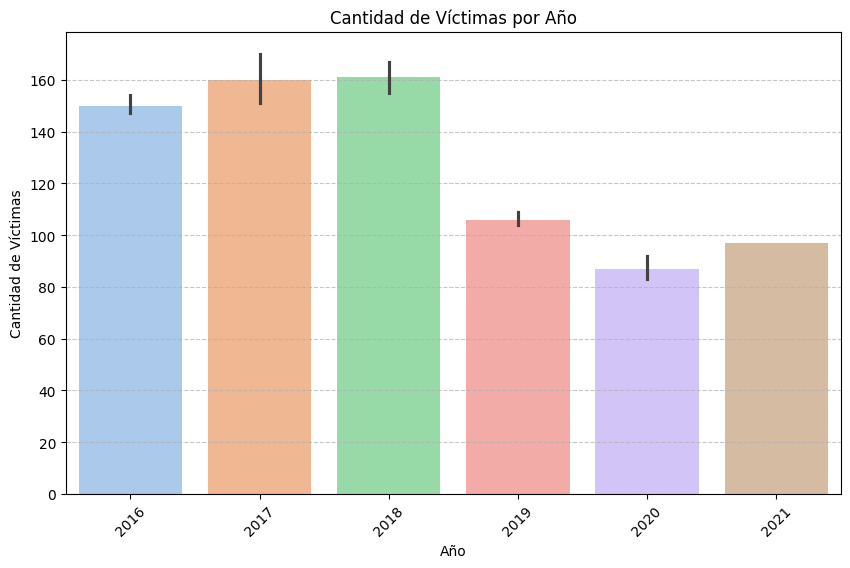

In [59]:
Databricks.victimas_por_anio(df_homicidios)

Podemos observar tanto en el año 2017 como en el 2018 la mayor cantidad de victimas.\
En el 2020 podemos observar que es el año con menor cantidad de victimas

### Distribucion Mensual

Se observa la cantidad total de accidentes fatales con una distribución mensual y se compara con los años.

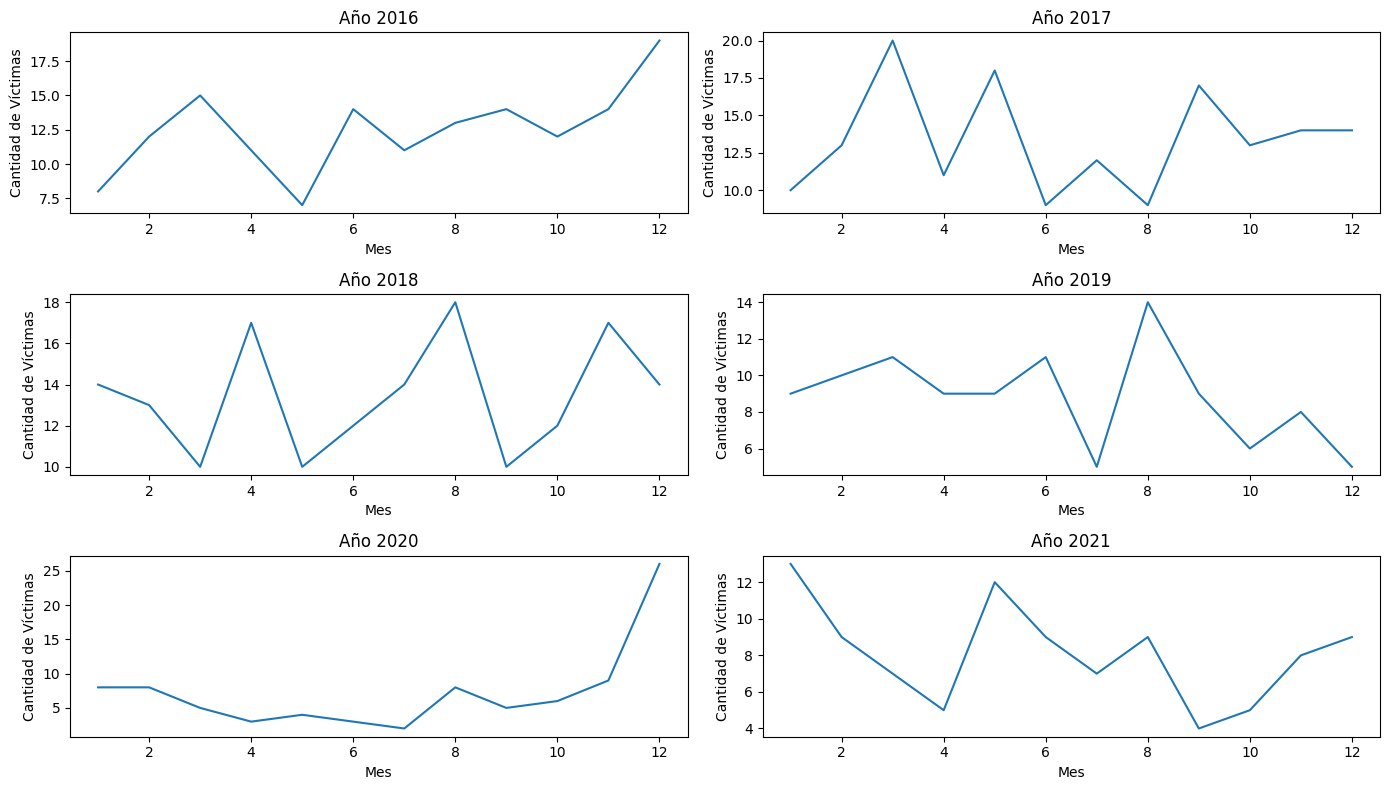

In [60]:
Databricks.accidentes_mensuales(df_homicidios)


No se identifica una tendencia consistente a lo largo del año al comparar los distintos períodos anuales mediante las gráficas anteriores. Los picos de accidentes fatales no muestran una correspondencia en términos de meses entre los diferentes años analizados. Sin embargo, se destaca de manera evidente una reducción significativa en la incidencia de accidentes mortales desde diciembre de 2019 hasta noviembre de 2020, lo cual parece estar vinculado a la implementación de medidas de confinamiento en respuesta a la pandemia de COVID-19.

Podemos observar la distribución de la cantidad de víctimas por mes, con un gráfico de barras que muestra la cantidad de víctimas por mes.\
Sobre la grafica podemos observar tanto el mes con menor cantidad de victimas como el mes con mayor cantidad de victimas

In [61]:

import Databricks


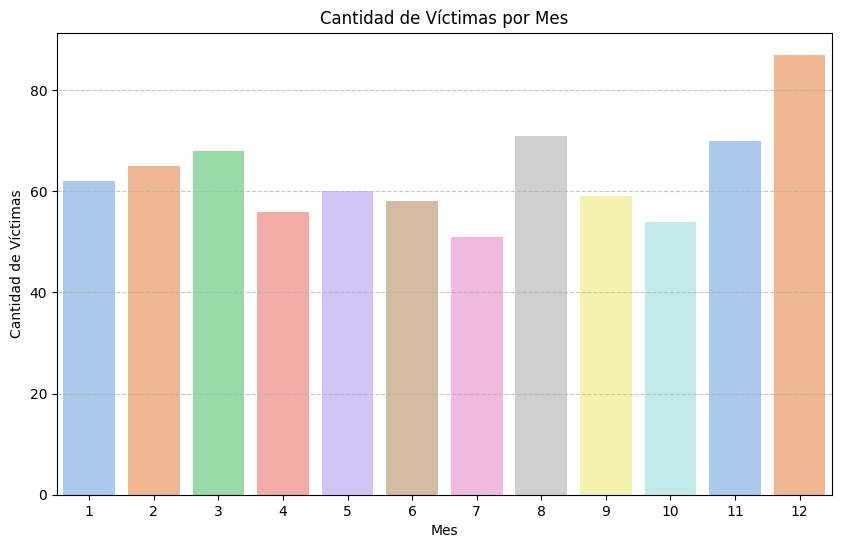

In [62]:
Databricks.victimas_por_mes(df_homicidios)

Si se considera la distribución anual de todos los registros disponibles, se puede observar que el patrón que existe a lo largo del año es un pico de accidentes en el mes de diciembre, siendo los meses con mas accidentes fatales Diciembre, Noviembre y Agosto. El mes con menos cantidad de accidentes fatales registrados es Julio .

### Distribucion Semanal

En este apartado se busca encontrar patrones en la cantidad de accidentes a lo largo de la semana

In [63]:
Databricks.cantidad_victimas_por_dia_semana(df_homicidios)

ValueError: time data "21/01/2016" doesn't match format "%m/%d/%Y", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Considerando el total de los registros, la distribución de los accidentes tienden a registrarse entre los viernes a lunes, con el máximo regritrado el día Domingo y el mínimo el día Miercoles. Sin embargo, la diferencia entre las cantidades mínima y máxima registrada en la semana es del 11.5% solamente.

### Distribucion por momento del dia 

Para este análisis se creó una nueva columna donde se caracterizaran los diferentes momentos del día con el siguiente criterio:

Mañana: de 6:00 a 10:59\
Medio día: de 11:00 a 13:59\
Tarde: de 14:00 a 18:59\
Noche: de 19:00 a 23:59\
Madrugada: de 24:00 a 05:59

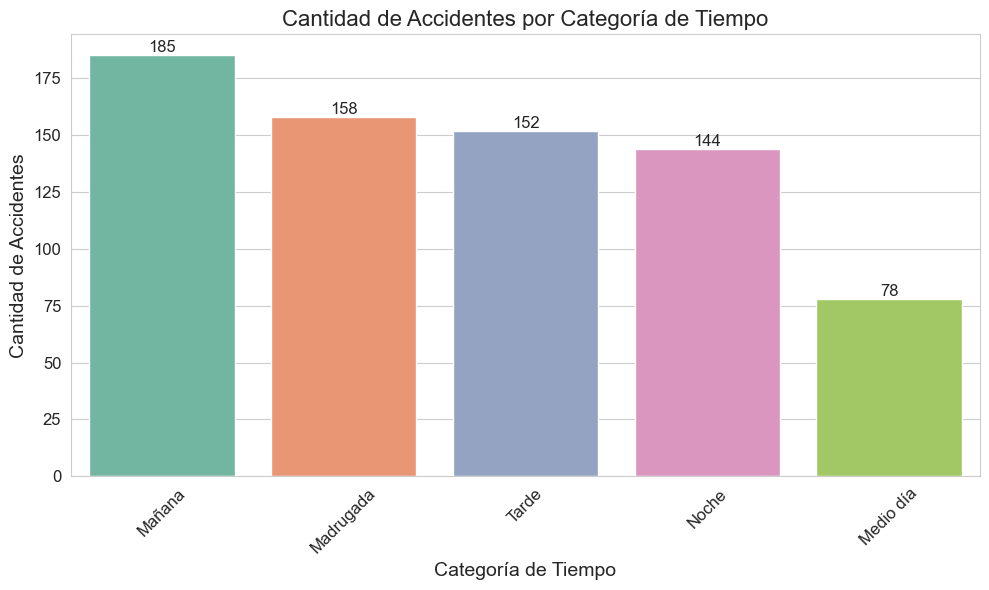

In [ ]:
import Databricks
Databricks.cantidad_accidentes_por_categoria_tiempo(df_homicidios)


Se observa que aproximadamente el 26% de los accidentes tienen lugar durante la mañana, un período asociado con una alta actividad laboral. En contraste, durante el mediodía se registra una proporción notablemente menor de accidentes fatales en comparación con otros momentos del día.

Ahora, para mayor detalle, se observa la distribución horaria de los accidentes.



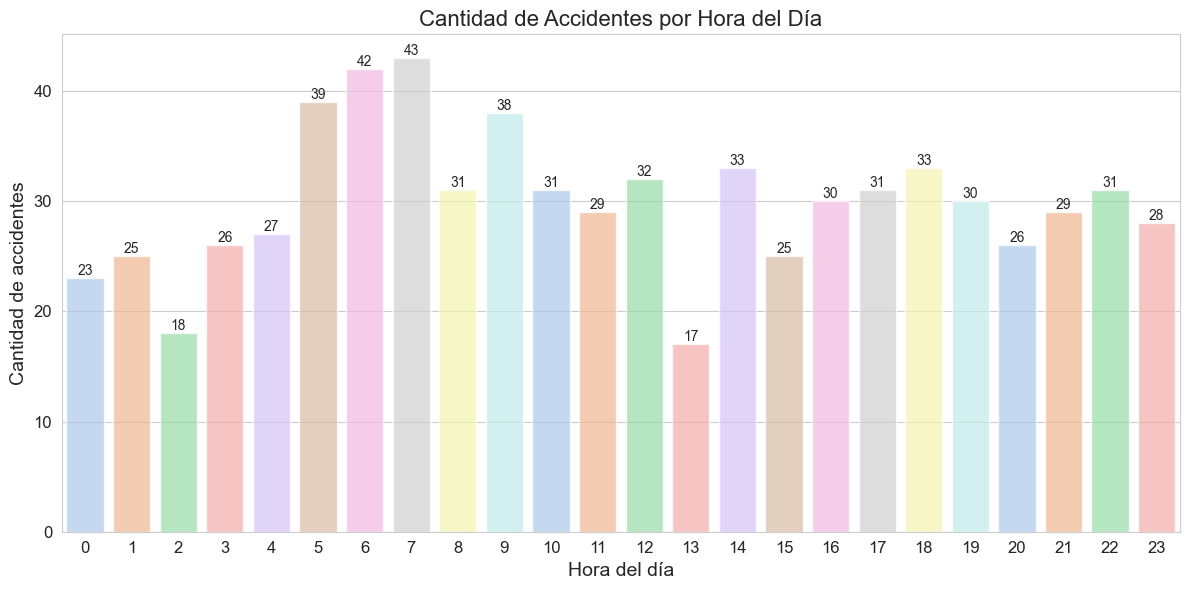

In [ ]:
Databricks.cantidad_accidentes_por_horas_del_dia(df_homicidios)


Al examinar la distribución horaria de los accidentes, se destaca un incremento significativo entre las 5:00 a.m. y las 8:00 a.m., asociado al inicio de la jornada laboral. Además, se observan picos adicionales alrededor de las 9:00 a.m., 14:00 horas, 18:00 horas y 22:00 horas, señalando momentos críticos de tráfico. Estos hallazgos subrayan la importancia de medidas preventivas y de gestión del tráfico en horas clave del día.

Ahora analizaremos la cantidad de accidentes con respecto a los dias, si corresponden a dias de Fin de semana o no

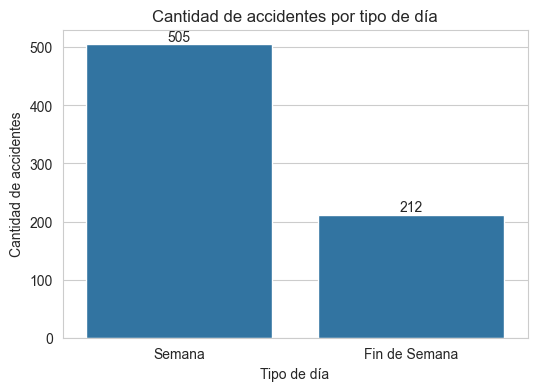

In [ ]:
Databricks.cantidad_accidentes_semana_fin_de_semana(df_homicidios)


Del análisis del gráfico se desprende que la mayoría de los accidentes ocurrieron durante la semana, con casi la mitad registrados en días laborables. Esto contrasta con el análisis previo, donde se observaron picos entre viernes y lunes. Sin embargo, al considerar la acumulación de accidentes de lunes a viernes como una única medida, se evidencia que los días de semana tienen un mayor número de incidentes en comparación con los fines de semana.

### Edad - victimas

En este punto se busca entender el patrón de distribución de las edades de las víctimas. En los siguientes gráficos se muestra el histograma de edades y un boxplot para entender su distribución de las mismas.

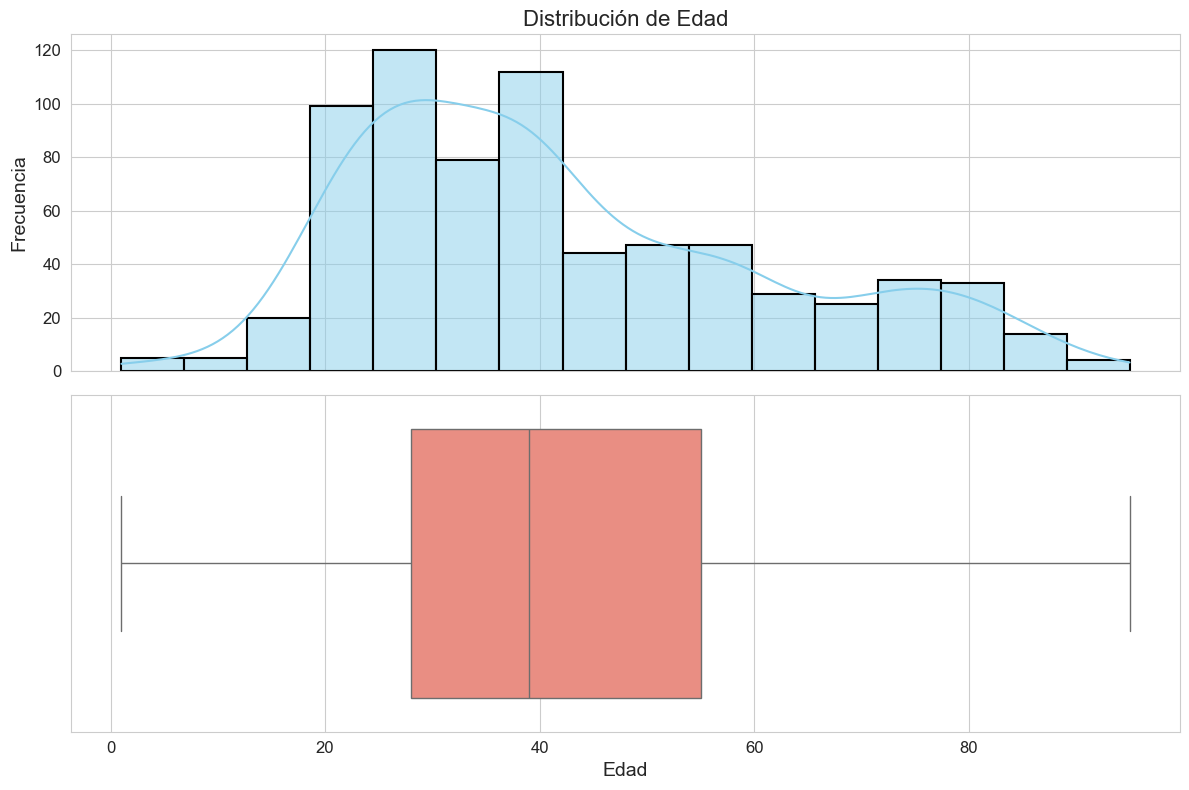

In [ ]:
Databricks.distribucion_edad(df_homicidios)

Los gráficos anteriores revelan que el 75% de los involucrados en accidentes tienen menos de 55 años, con una mediana de 39 años. No se identifican edades atípicas. Aunque se registran edades desde 1 hasta 95 años, es importante señalar que estos datos abarcan todas las víctimas, no necesariamente conductores al momento del accidente. El histograma exhibe una distribución ligeramente sesgada hacia la derecha, con la mayoría de los accidentes concentrados en el rango de 20 a 40 años.

A continuacion se puede ver en detalle la distribución de las edades por año.



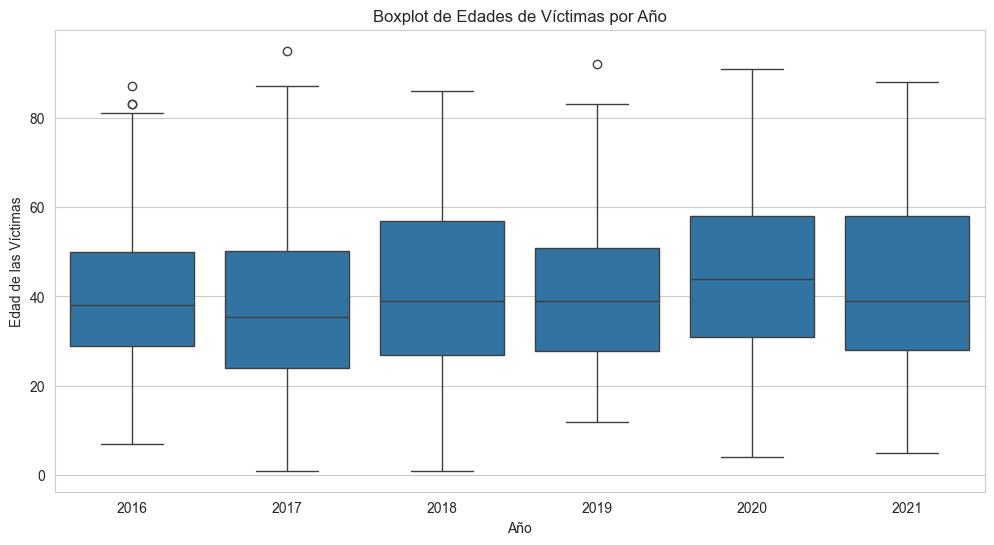

In [ ]:
Databricks.distribucion_edad_por_anio(df_homicidios)


Las distribuciones de edades exhiben una consistencia notable a lo largo de los años registrados, con una mediana cercana a los 40 años. Se identifican algunos valores atípicos relacionados con adultos mayores como víctimas de accidentes, particularmente en los años 2016, 2017 y 2019.

Considero una relación interesante  ver  la variación entre los grupos de Masculinos y Femeninos según la edad.

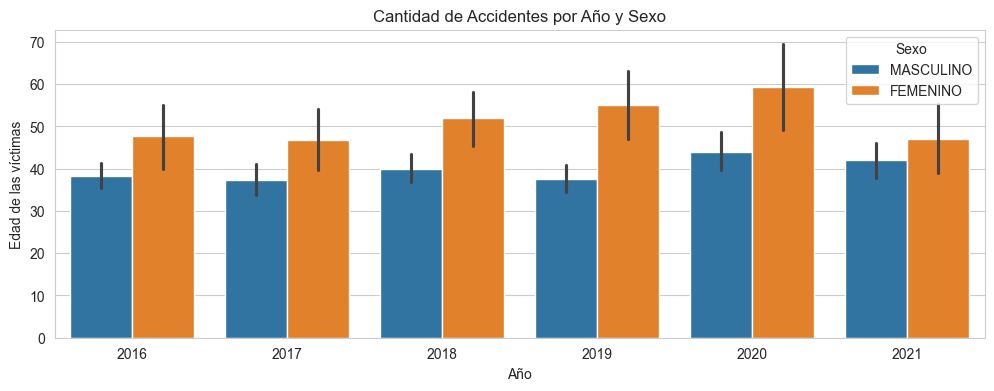

In [ ]:
Databricks.cantidades_accidentes_por_anio_y_sexo(df_homicidios)


Para una mejor interpretacion , observaremos  los datos numéricos de ese gráfico

In [ ]:
resumen_sexo_año = df_homicidios.groupby(['Año', 'Sexo']).size().reset_index(name='Cantidad accidentes')
resumen_sexo_año

,Año,Sexo,Cantidad accidentes
0,2016,FEMENINO,27
1,2016,MASCULINO,119
2,2017,FEMENINO,36
3,2017,MASCULINO,104
4,2018,FEMENINO,38
5,2018,MASCULINO,111
6,2019,FEMENINO,27
7,2019,MASCULINO,77
8,2020,FEMENINO,16
9,2020,MASCULINO,65


En el gráfico previo, se aprecia una tendencia creciente en las edades de las mujeres fallecidas hasta el año 2020, con edades predominantes entre los 40 y 50 años, seguida de una disminución en 2021. Por otro lado, en los hombres, se observa una leve tendencia al aumento de la edad de fallecimiento, manteniéndose alrededor de los 40 años, aunque con una edad promedio menor que la de las mujeres.



Para analizar con mayor precisión la magnitud de esta diferencia entre los dos grupos, se opta por utilizar el estadístico de Cohen. Este estadístico, comúnmente utilizado en pruebas de hipótesis y comparación de grupos, permite determinar si una diferencia observada es significativa desde un punto de vista práctico

In [ ]:
# Se definen los grupos
grupo1_completo = df_homicidios[df_homicidios['Sexo'] == 'MASCULINO']['Edad']
grupo2_completo = df_homicidios[df_homicidios['Sexo'] == 'FEMENINO']['Edad']
# Se calcula el Cohen
d = Databricks.cohen(grupo1_completo, grupo2_completo)
print(f'El valor de Cohen es: {round(d,2)}')

El valor de Cohen es: -0.61


El valor de Cohen obtenido entre los dos grupos analizados es de -0.61, indicando un efecto de tamaño moderado a alto. Esta diferencia sugiere que existe una marcada disparidad en la edad promedio entre estos grupos, favoreciendo a las mujeres. En otras palabras, el grupo de hombres tiende a ser más joven en promedio en comparación con el grupo de mujeres, lo cual confirma la tendencia observada en el gráfico anterior

Continuando con el análisis de las edades,  analizaremos cómo se distribuyen las edades para la condición de la victima, es decir el 'rol' en el hecho.

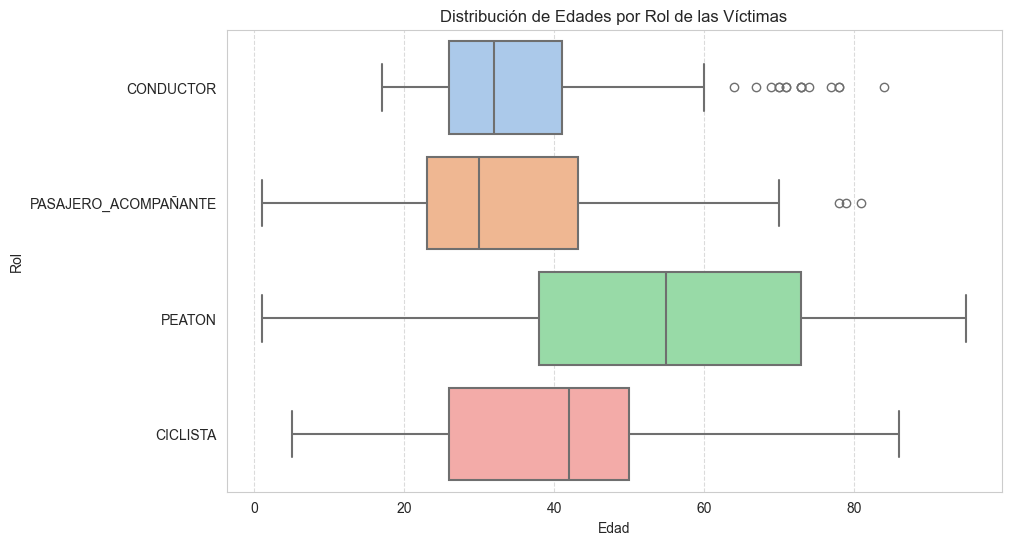

In [ ]:
Databricks.edad_y_rol_victimas(df_homicidios)


Al analizar las edades promedio de los cuatro roles examinados, encontramos similitudes entre la edad del conductor de auto y del pasajero acompañante, ambos alrededor de los 35 años. Se observa una edad mínima de alrededor de 18 años para el conductor, mientras que en los otros roles es posible encontrar víctimas más jóvenes, lo que sugiere la presencia de niños siendo trasladados.

Por otro lado, los peatones exhiben una amplia dispersión en las edades, desde niños pequeños hasta adultos mayores cercanos a los 90 años.

Aunque se identifican valores atípicos en los roles de conductor y pasajero acompañante, estos casos se consideran dentro del rango esperado y reflejan situaciones comunes en el conjunto de datos.

Finalmente, se analiza la relación de la edad con los distintos vehículos que ocupaba la victima (o si era peatón)

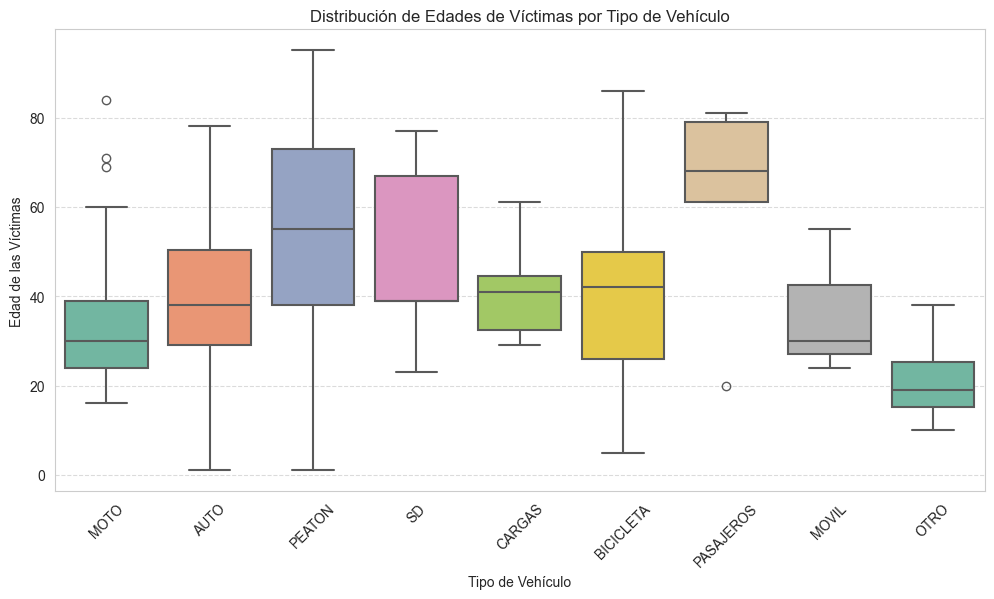

In [ ]:
Databricks.distribucion_edad_por_victima(df_homicidios)


Se identifica una notable dispersión en las edades de las víctimas fatales según el tipo de vehículo que ocupaban en el momento del incidente. Destaca el amplio rango de edades en el caso de los peatones, contrastando con una mayor concentración de víctimas de mayor edad en el rol de pasajeros, mientras que las víctimas más jóvenes se encuentran mayormente asociadas a motocicletas y otros tipos de vehículos.

### Participantes en los accidentes


En este apartado se analizan las cantidades de víctimas en función a los medios de transporte que participaron del hecho.



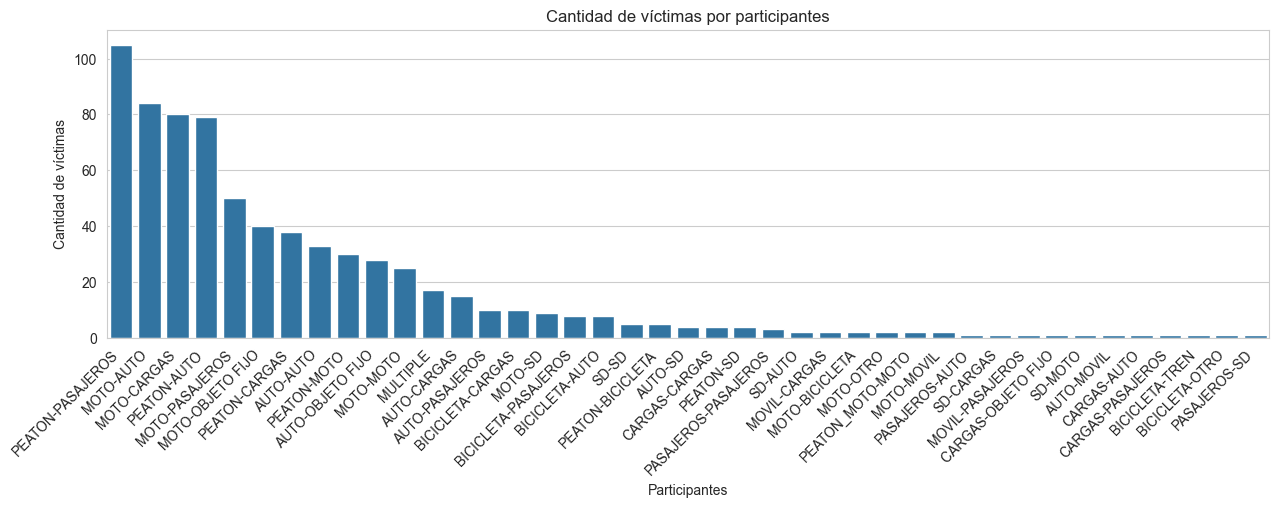

In [ ]:
Databricks.cantidad_victimas_participantes(df_homicidios)


Wow! Descubrimos un dato que causa confusion al razonarlo... Miremos quienes tienen mayor cantidad de victimas... Peaton-Pasajeros??\
Surge como un hallazgo significativo que la mayor cantidad de víctimas se registra en incidentes que involucran peatones y pasajeros. De acuerdo con la definición proporcionada en el diccionario de datos, un peatón se refiere a cualquier individuo afectado que no sea conductor ni pasajero de un vehículo, mientras que un pasajero se refiere a cualquier persona lesionada dentro, descendiendo o ascendiendo de vehículos de transporte público de pasajeros u ómnibus de larga distancia. Este hallazgo plantea interrogantes sobre las circunstancias particulares que rodean a estos incidentes y merece una investigación más detallada para comprender mejor las dinámicas subyacentes.

In [ ]:
df_homicidios[df_homicidios['Participantes'] == 'PEATON-PASAJEROS'][['Participantes', 'Víctima', 'Acusado']]


,Participantes,Víctima,Acusado
13,PEATON-PASAJEROS,PEATON,PASAJEROS
21,PEATON-PASAJEROS,PEATON,PASAJEROS
23,PEATON-PASAJEROS,PEATON,PASAJEROS
27,PEATON-PASAJEROS,PEATON,PASAJEROS
34,PEATON-PASAJEROS,PEATON,PASAJEROS
...,...,...,...
679,PEATON-PASAJEROS,PEATON,PASAJEROS
684,PEATON-PASAJEROS,PEATON,PASAJEROS
685,PEATON-PASAJEROS,PEATON,PASAJEROS
706,PEATON-PASAJEROS,PEATON,PASAJEROS


La observación de los datos relacionados con la categoría de participante como "Peatón-Pasajero" sugiere que cuando la víctima es un peatón y el acusado es un pasajero, probablemente se refiere a incidentes asociados con personas que están subiendo, bajando o viajando en algún medio de transporte público. Esta interpretación inicial nos brinda un punto de partida para comprender estos casos, aunque requiere una validación adicional por parte de las partes interesadas.

Además, al examinar el gráfico anterior, se destaca que los incidentes que involucran motocicletas, automóviles y vehículos de carga son los que registran la mayor cantidad de víctimas. Este hallazgo subraya la importancia de centrar la atención en estos tipos de accidentes para implementar medidas de prevención y seguridad adecuadas.

### Acusados

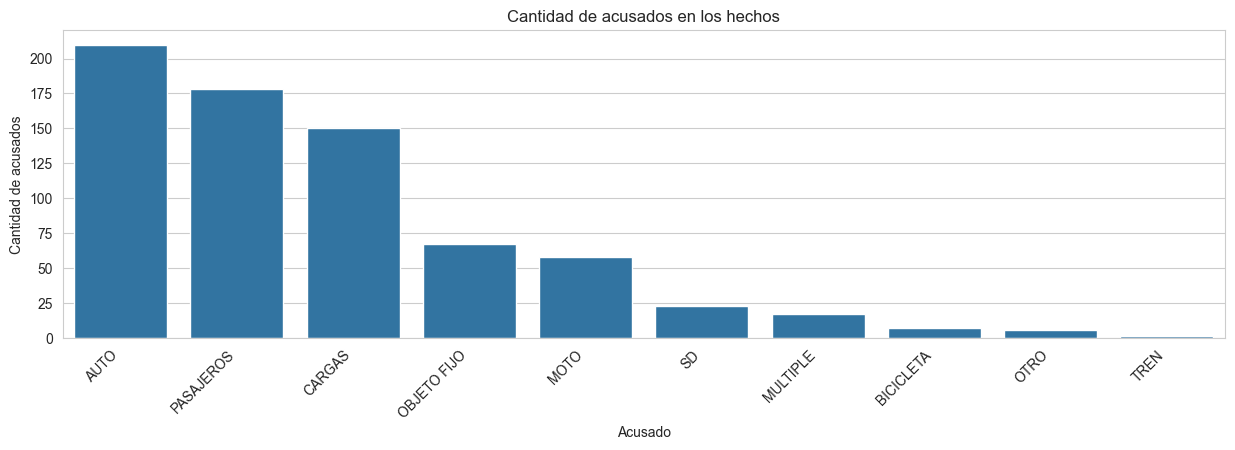

In [ ]:
Databricks.cantidad_acusados(df_homicidios)


El análisis del gráfico sugiere que la mayor responsabilidad en los incidentes registrados recae en los conductores de automóviles, seguidos por los pasajeros y los vehículos de carga (este último término se refiere a vehículos comerciales de transporte de mercancías). La prevalencia de conductores de automóviles como principales implicados en los accidentes resalta la importancia de políticas y medidas de seguridad destinadas a mejorar la conducta y la responsabilidad en la conducción.

Además, la presencia significativa de pasajeros en los incidentes, particularmente en relación con el transporte público, respalda la interpretación previa sobre la categoría de "Peatón-Pasajero", brindando coherencia a la discusión anterior. Este análisis refuerza la necesidad de enfocarse en la seguridad tanto para los conductores como para los pasajeros, especialmente en el contexto del transporte público.

### Tipo de calle donde ocurren los hechos


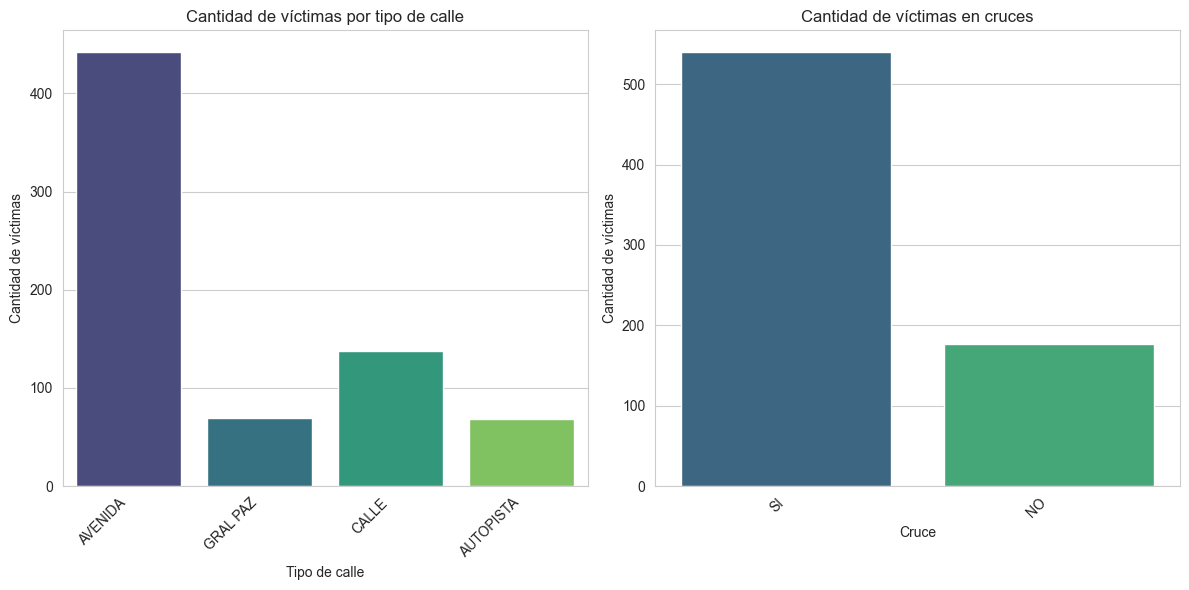

In [ ]:
Databricks.accidentes_tipo_de_calle(df_homicidios)


la mayor cantidad de hechos con víctimas fatales ocurren en las avenidas y en particular en los cruces de calles.

# Carga del DataFrame

In [ ]:
path_archivo_limpio = '../DataExportada/homicidios_limpio.csv'
df_homicidios.to_csv(path_archivo_limpio, index=False, encoding='utf-8')
print(f'Se guardó el archivo {path_archivo_limpio}')

Se guardó el archivo ../DataExportada/homicidios_limpio.csv
